In [23]:
import pandas as pd
import urllib
from nltk import word_tokenize


# Importing the file from the URL

In [19]:
URL='https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'

file=urllib.request.urlopen(URL)



124203


# Creating a list of all the lines

In [ ]:
k=0
lines=[]
for line in file:
    decoded_line = line.decode("utf-8")
    k=k+1
    if k>253:
        lines.append(decoded_line)
        
    
print(len(lines))

In [32]:
lines[0]

'  From fairest creatures we desire increase,\n'

# Importing the Stopwords

In [34]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
print(sw[0])

i


# Splitting the Sentences into tokens (words)
##filtering out Stopwords

In [38]:
tokens=[]
for i in lines:
    temp_token=word_tokenize(i)
    for j in temp_token:
        if j.lower() not in sw:
            tokens.append(j.lower())
            
            
            
    

In [39]:
#size check
print(len(tokens))

706319


In [40]:
#Sample check
print(tokens[0:100])

['fairest', 'creatures', 'desire', 'increase', ',', 'thereby', 'beauty', "'s", 'rose', 'might', 'never', 'die', ',', 'riper', 'time', 'decease', ',', 'tender', 'heir', 'might', 'bear', 'memory', ':', 'thou', 'contracted', 'thine', 'bright', 'eyes', ',', "feed'st", 'thy', 'light', "'s", 'flame', 'self-substantial', 'fuel', ',', 'making', 'famine', 'abundance', 'lies', ',', 'thy', 'self', 'thy', 'foe', ',', 'thy', 'sweet', 'self', 'cruel', ':', 'thou', 'art', 'world', "'s", 'fresh', 'ornament', ',', 'herald', 'gaudy', 'spring', ',', 'within', 'thine', 'bud', 'buriest', 'thy', 'content', ',', 'tender', 'churl', "mak'st", 'waste', 'niggarding', ':', 'pity', 'world', ',', 'else', 'glutton', ',', 'eat', 'world', "'s", 'due', ',', 'grave', 'thee', '.', '2', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow', ',', 'dig', 'deep']


# Checking word frequency (Top 5)

In [45]:
from collections import Counter
Word_Count=Counter(tokens)
print(Word_Count.most_common(75))

[(',', 83066), ('.', 77315), (';', 17194), ('?', 10475), ("'d", 8869), ('!', 8827), ("'s", 7694), ('thou', 5472), ("'", 4308), ('thy', 4030), ('shall', 3583), ('thee', 3163), ('lord', 3042), ('king', 3022), ('good', 2793), ('sir', 2735), ('come', 2498), ("'ll", 2409), ('let', 2346), ('would', 2289), ('well', 2137), ('love', 2122), ('enter', 2106), ('[', 2071), (']', 2063), ('man', 1981), ('hath', 1938), ('may', 1849), (':', 1810), ('one', 1781), ('upon', 1733), ('go', 1722), ('like', 1701), ('say', 1669), ('us', 1668), ('know', 1638), ("'t", 1630), ('make', 1629), ('yet', 1560), ('must', 1490), ('see', 1434), ('give', 1326), ('time', 1291), ('take', 1194), ('mine', 1159), ('first', 1158), ('speak', 1156), ('th', 1150), ('duke', 1126), ('tell', 1055), ('father', 1054), ('exeunt', 1035), ('much', 1030), ('heart', 1021), ('think', 1018), ('never', 1007), ('exit', 984), ('queen', 966), ('doth', 939), ('men', 935), ('lady', 919), ('look', 917), ('art', 915), ('great', 896), ('world', 884), 

# Further refining of Stopwords

In [54]:
sw_1=[',','.',';','?',"'d",'!',"'","'ll",'[',']',':',"'t",'th',"'s",'(',')']

updated_tokens=[]

for i in tokens:
    if i not in sw_1:
        updated_tokens.append(i)
        
        

In [55]:
print(len(updated_tokens))

476237


# Checking Again the Word Frequency

In [56]:
Word_Count=Counter(updated_tokens)
print(Word_Count.most_common(100))

[('thou', 5472), ('thy', 4030), ('shall', 3583), ('thee', 3163), ('lord', 3042), ('king', 3022), ('good', 2793), ('sir', 2735), ('come', 2498), ('let', 2346), ('would', 2289), ('well', 2137), ('love', 2122), ('enter', 2106), ('man', 1981), ('hath', 1938), ('may', 1849), ('one', 1781), ('upon', 1733), ('go', 1722), ('like', 1701), ('say', 1669), ('us', 1668), ('know', 1638), ('make', 1629), ('yet', 1560), ('must', 1490), ('see', 1434), ('give', 1326), ('time', 1291), ('take', 1194), ('mine', 1159), ('first', 1158), ('speak', 1156), ('duke', 1126), ('tell', 1055), ('father', 1054), ('exeunt', 1035), ('much', 1030), ('heart', 1021), ('think', 1018), ('never', 1007), ('exit', 984), ('queen', 966), ('doth', 939), ('men', 935), ('lady', 919), ('look', 917), ('art', 915), ('great', 896), ('world', 884), ('god', 884), ('death', 874), ('hear', 869), ('away', 853), ('life', 841), ('master', 831), ('hand', 829), ('made', 824), ('scene', 794), ('sweet', 786), ('true', 782), ('prince', 770), ('thus

# Trying to lemmatize and check Word Frequency again

In [58]:
from nltk.stem import WordNetLemmatizer
#sample checks
print('thou',WordNetLemmatizer().lemmatize('thou'))
print('thy',WordNetLemmatizer().lemmatize('thy'))

thou thou
thy thy


In [59]:
lemmatized_tokens=[ WordNetLemmatizer().lemmatize(i) for i in updated_tokens]

In [60]:
print(len(lemmatized_tokens))

476237


In [61]:
Word_Count=Counter(lemmatized_tokens)
print(Word_Count.most_common(100))


[('thou', 5472), ('thy', 4030), ('shall', 3583), ('lord', 3503), ('thee', 3163), ('king', 3138), ('come', 3113), ('good', 2816), ('sir', 2777), ('let', 2367), ('love', 2320), ('would', 2289), ('well', 2139), ('enter', 2106), ('make', 1985), ('man', 1983), ('hath', 1938), ('say', 1906), ('go', 1895), ('know', 1851), ('may', 1849), ('one', 1838), ('upon', 1733), ('like', 1728), ('u', 1671), ('yet', 1560), ('time', 1493), ('must', 1490), ('see', 1480), ('give', 1471), ('take', 1303), ('heart', 1195), ('god', 1169), ('mine', 1168), ('first', 1158), ('speak', 1156), ('duke', 1150), ('hand', 1147), ('look', 1131), ('eye', 1098), ('tell', 1097), ('father', 1097), ('think', 1075), ('lady', 1061), ('life', 1044), ('exeunt', 1035), ('much', 1030), ('never', 1007), ('exit', 985), ('queen', 975), ('day', 943), ('doth', 939), ('master', 936), ('men', 935), ('art', 928), ('word', 910), ('friend', 901), ('death', 897), ('great', 896), ('world', 887), ('prince', 870), ('hear', 869), ('son', 865), ('aw

# Visualizing with WordCloud

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
w_cloud=WordCloud( width=3000,height=3000,background_color='white').generate(" ".join(lemmatized_tokens))

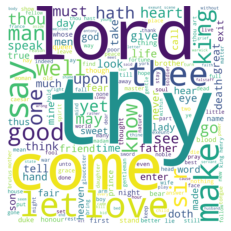

In [75]:
plt.imshow(w_cloud,interpolation="bilinear")
plt.axis('off')
plt.show()